1. **Log GDP per capita**: Adjusted for PPP in 2017 international dollars, using WDI data; extended for 2022 with real GDP growth forecasts, adjusted for population growth.

2. **Healthy life expectancy**: WHO data for 2005-2019 interpolated/extrapolated to match 2005-2022.

3. **Social support (0-1)**: National average of binary responses to having friends or relatives to rely on.

4. **Freedom to make life choices (0-1)**: National average of satisfaction with freedom to choose life activities.

5. **Generosity**: Residual from regressing charity donation responses on log GDP per capita.

6. **Perceptions of corruption (0-1)**: Average of responses on government and business corruption.

7. **Positive affect**: Average of previous-day feelings of laughter, enjoyment, and interest.

8. **Negative affect**: Average of previous-day feelings of worry, sadness, and anger.


In [3]:
import pandas as pd
import os

In [5]:
happiness = pd.read_csv("../data/processed/happiness.csv")

In [7]:
happiness.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Albania,Central and Eastern Europe,2007,4.634252,9.121704,0.821372,66.760002,0.528605,-0.010429,0.874700,0.488819,0.246335,0.300681
1,Albania,Central and Eastern Europe,2009,5.485470,9.241429,0.833047,67.320000,0.525223,-0.159259,0.863665,0.564474,0.279257,NaN
2,Albania,Central and Eastern Europe,2010,5.268937,9.282793,0.733152,67.599998,0.568958,-0.173675,0.726262,0.576077,0.300060,NaN
3,Albania,Central and Eastern Europe,2011,5.867422,9.310619,0.759434,67.879997,0.487496,-0.206186,0.877003,0.565759,0.256577,NaN
4,Albania,Central and Eastern Europe,2012,5.510124,9.326344,0.784502,68.160004,0.601512,-0.170467,0.847675,0.553473,0.271393,0.364894


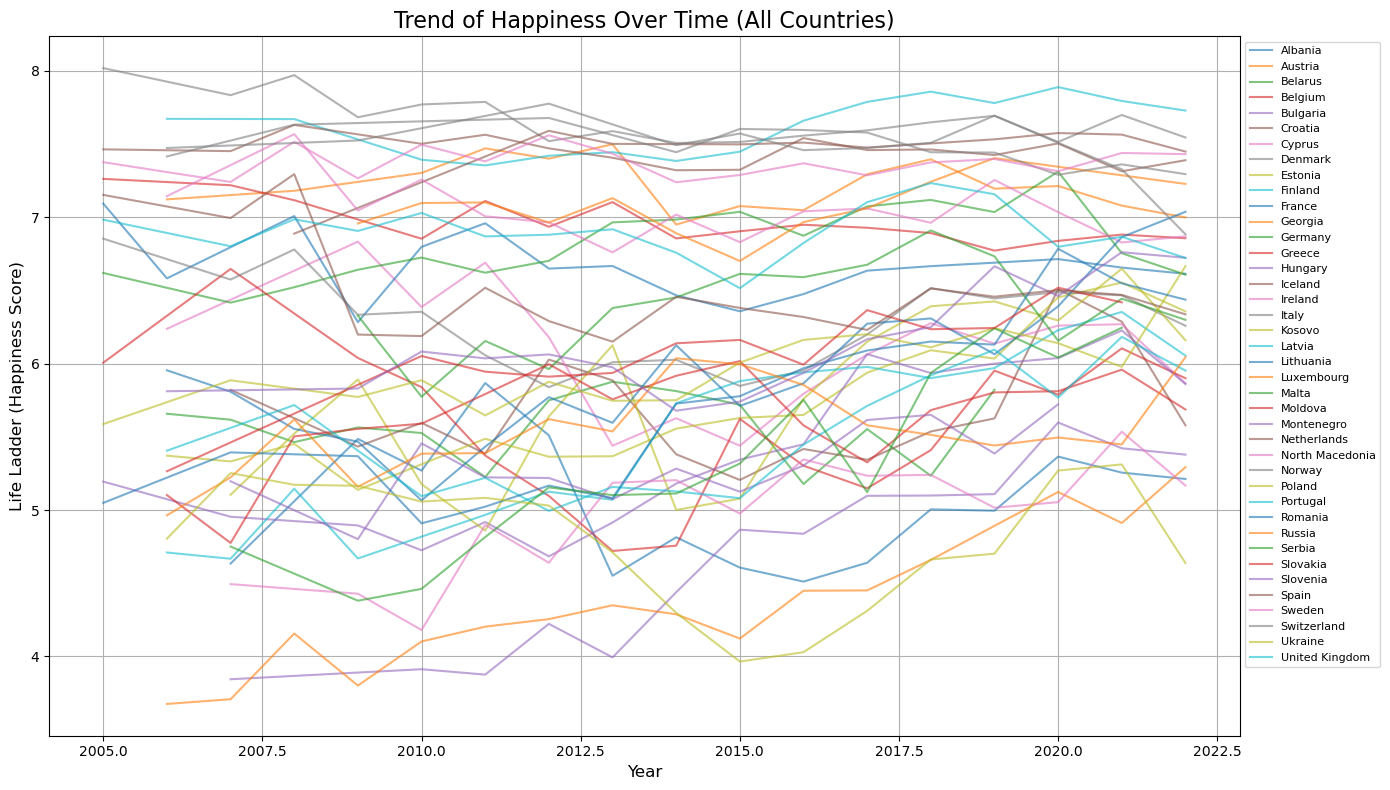

In [11]:
import matplotlib.pyplot as plt

# Trend of Happiness Over Time (All Countries)
plt.figure(figsize=(14, 8))
for country in happiness['Country Name'].unique():
    country_data = happiness[happiness['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Life Ladder'], label=country, alpha=0.6)

plt.title('Trend of Happiness Over Time (All Countries)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)  # Legend outside the plot
plt.grid()
plt.tight_layout()
plt.show()




<Figure size 1200x600 with 0 Axes>

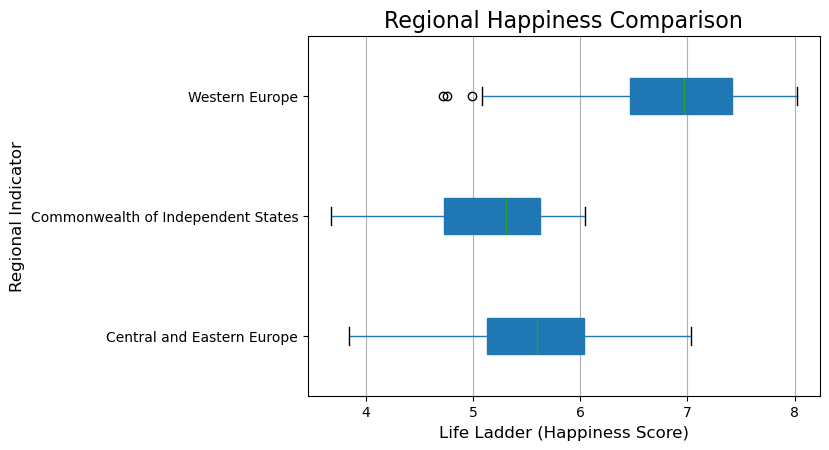

In [13]:
# Regional Happiness Comparison (Box Plot)
plt.figure(figsize=(12, 6))
happiness.boxplot(column='Life Ladder', by='Regional Indicator', vert=False, patch_artist=True)
plt.title('Regional Happiness Comparison', fontsize=16)
plt.suptitle('')  # Remove default title
plt.xlabel('Life Ladder (Happiness Score)', fontsize=12)
plt.ylabel('Regional Indicator', fontsize=12)
plt.grid(axis='y')
plt.show()



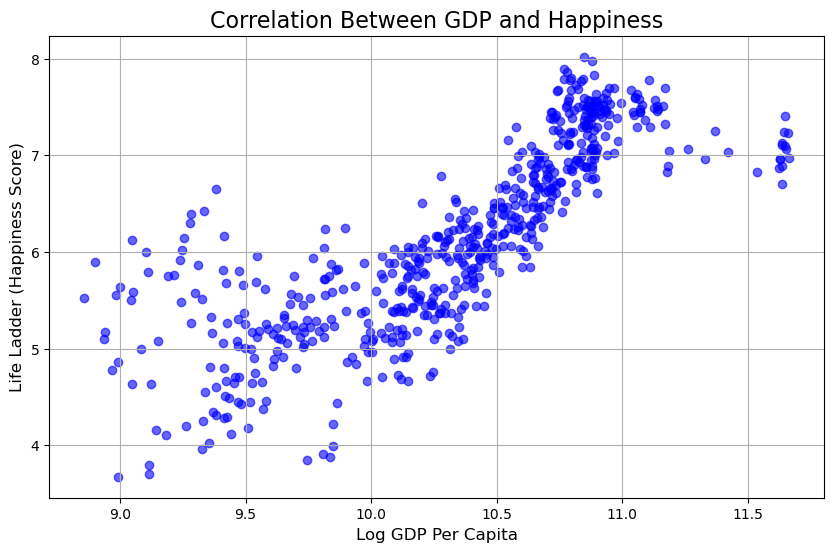

In [15]:
# Correlation Between GDP and Happiness (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(happiness['Log GDP Per Capita'], happiness['Life Ladder'], alpha=0.6, c='blue')
plt.title('Correlation Between GDP and Happiness', fontsize=16)
plt.xlabel('Log GDP Per Capita', fontsize=12)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12)
plt.grid()
plt.show()

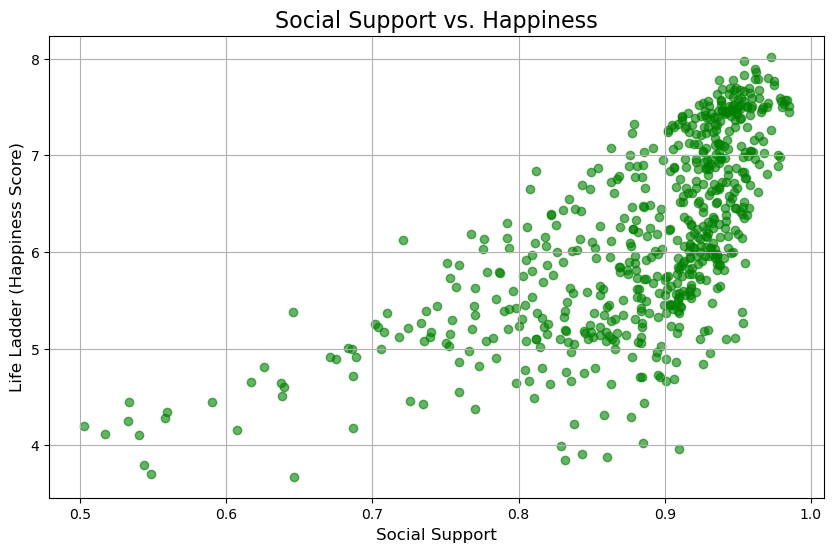

In [17]:
# Social Support vs. Happiness (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(happiness['Social Support'], happiness['Life Ladder'], alpha=0.6, c='green')
plt.title('Social Support vs. Happiness', fontsize=16)
plt.xlabel('Social Support', fontsize=12)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12)
plt.grid()
plt.show()



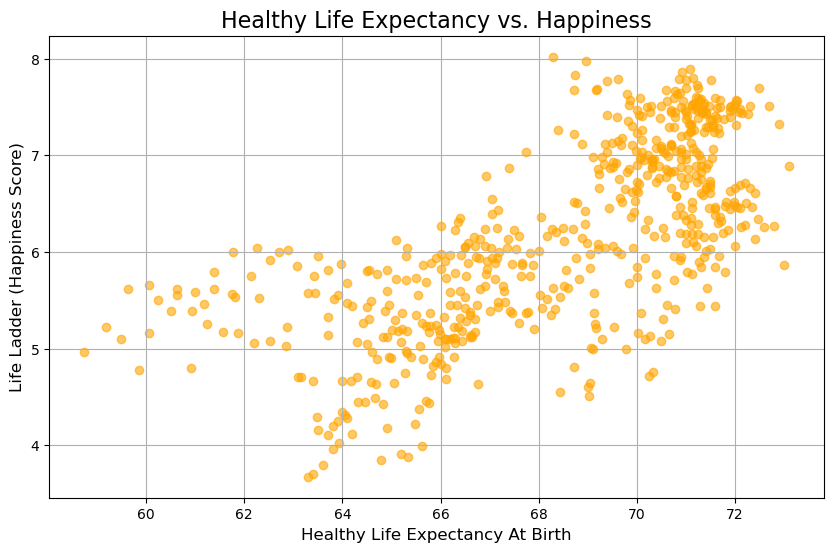

In [19]:
# Healthy Life Expectancy vs. Happiness (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(happiness['Healthy Life Expectancy At Birth'], happiness['Life Ladder'], alpha=0.6, c='orange')
plt.title('Healthy Life Expectancy vs. Happiness', fontsize=16)
plt.xlabel('Healthy Life Expectancy At Birth', fontsize=12)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12)
plt.grid()
plt.show()



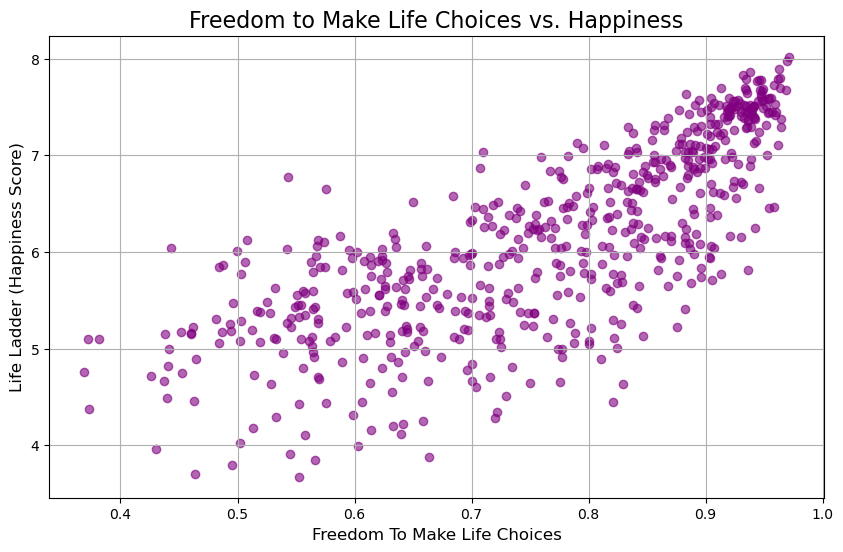

In [21]:
# Freedom to Make Life Choices vs. Happiness (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(happiness['Freedom To Make Life Choices'], happiness['Life Ladder'], alpha=0.6, c='purple')
plt.title('Freedom to Make Life Choices vs. Happiness', fontsize=16)
plt.xlabel('Freedom To Make Life Choices', fontsize=12)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12)
plt.grid()
plt.show()

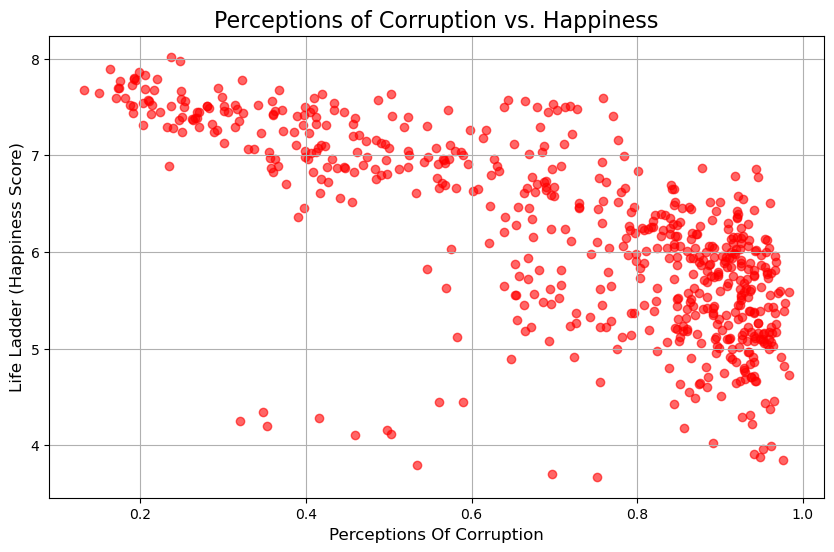

In [23]:
# Perceptions of Corruption vs. Happiness (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(happiness['Perceptions Of Corruption'], happiness['Life Ladder'], alpha=0.6, c='red')
plt.title('Perceptions of Corruption vs. Happiness', fontsize=16)
plt.xlabel('Perceptions Of Corruption', fontsize=12)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12)
plt.grid()
plt.show()

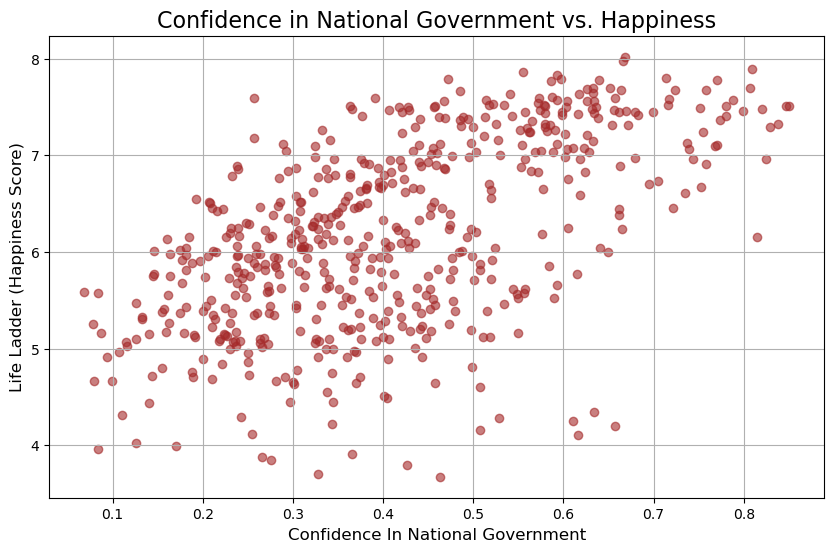

In [27]:
# Confidence in National Government vs. Happiness (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(happiness['Confidence In National Government'], happiness['Life Ladder'], alpha=0.6, c='brown')
plt.title('Confidence in National Government vs. Happiness', fontsize=16)
plt.xlabel('Confidence In National Government', fontsize=12)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12)
plt.grid()
plt.show()


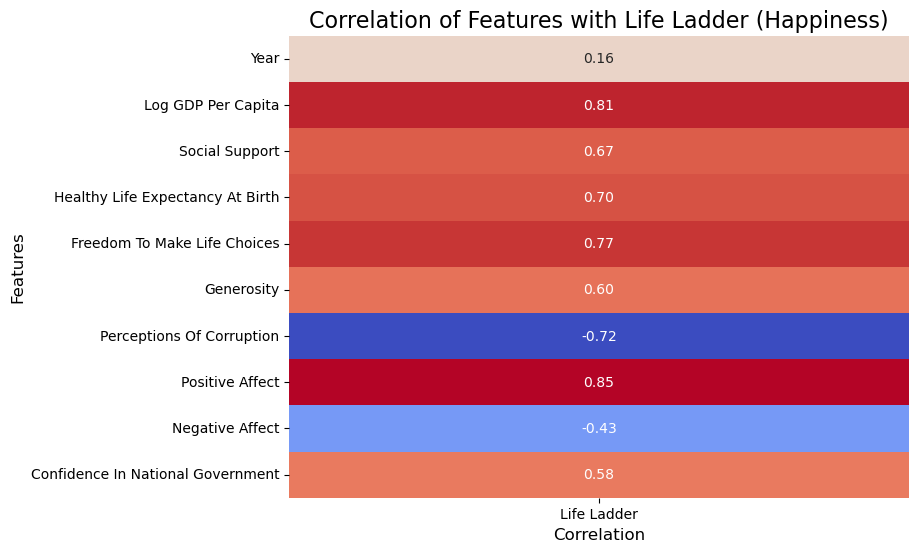

In [45]:
# Correlation Matrix Heatmap (Focused on Happiness)
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_data = happiness.select_dtypes(include=['float64', 'int64'])

# Compute correlation of numeric features with Life Ladder
correlation_with_happiness = numeric_data.corr()["Life Ladder"].drop("Life Ladder")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_happiness.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.title('Correlation of Features with Life Ladder (Happiness)', fontsize=16)
plt.ylabel('Features', fontsize=12)
plt.xlabel('Correlation', fontsize=12)
plt.show()

